### 1. Import Dependecies

In [38]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### 2. Load Dataset

In [65]:
X_train_smote = joblib.load("D:\Study\Model X\Dementia Prediction\Data_Preprocessing\Artifacts\X_train_smote.pkl")
y_train_smote = joblib.load("D:\Study\Model X\Dementia Prediction\Data_Preprocessing\Artifacts\y_train_smote.pkl")
X_test = joblib.load("D:\Study\Model X\Dementia Prediction\Data_Preprocessing\Artifacts\X_test.pkl")
y_test = joblib.load("D:\Study\Model X\Dementia Prediction\Data_Preprocessing\Artifacts\y_test.pkl")

In [66]:
if isinstance(y_train_smote, pd.DataFrame):
    y_train_smote = y_train_smote.iloc[:, 0]

In [67]:
voting_clf_best = joblib.load("D:\Study\Model X\Dementia Prediction\Models/voting_clf_best.pkl")


### 3. Check Over-fitting

In [6]:
# Predict on training data
y_train_pred = voting_clf_best.predict(X_train_smote)
y_train_prob = voting_clf_best.predict_proba(X_train_smote)[:,1]

# Predict on test data
y_test_pred = voting_clf_best.predict(X_test)
y_test_prob = voting_clf_best.predict_proba(X_test)[:,1]

# Metrics
print("Train F1:", f1_score(y_train_smote, y_train_pred))
print("Test F1:", f1_score(y_test, y_test_pred))

print("Train ROC-AUC:", roc_auc_score(y_train_smote, y_train_prob))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_prob))

Train F1: 0.9412789795899748
Test F1: 0.8364047287899861
Train ROC-AUC: 0.9935771769907975
Test ROC-AUC: 0.9516870899245812


C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
2 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mitheesha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mitheesha\AppData\Roaming\Python\Py

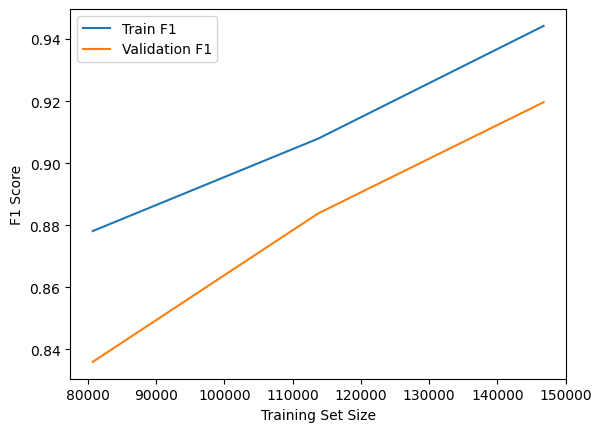

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    voting_clf_best, X_train_smote, y_train_smote, cv=3,
    scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Train F1')
plt.plot(train_sizes, test_scores_mean, label='Validation F1')
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

### 4. Check

In [68]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[25654  1868]
 [ 1896  9622]]


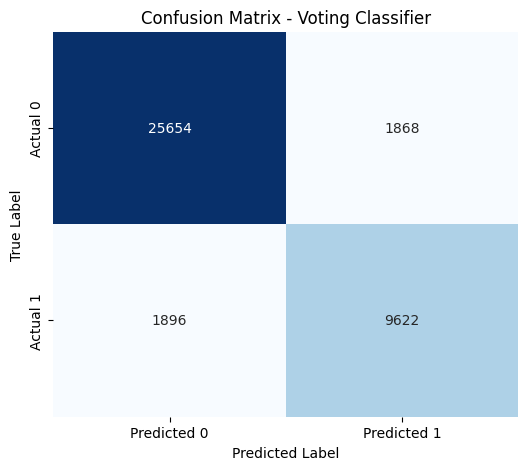

In [69]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0','Predicted 1'],
            yticklabels=['Actual 0','Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Voting Classifier")
plt.show()

In [70]:
y_test_prob = voting_clf_best.predict_proba(X_test)[:, 1]

In [71]:
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []
recalls = []
conf_matrices = []

for t in thresholds:
    y_pred_thresh = (y_test_prob >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))
    
    # Calculate recall manually
    true_positives = ((y_test == 1) & (y_pred_thresh == 1)).sum()
    actual_positives = (y_test == 1).sum()
    recall = true_positives / actual_positives
    recalls.append(recall)
    
    conf_matrices.append(confusion_matrix(y_test, y_pred_thresh))

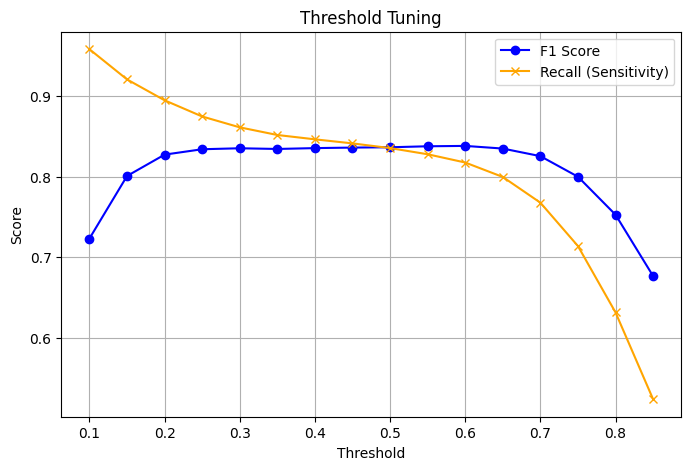

In [72]:
plt.figure(figsize=(8,5))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue', marker='o')
plt.plot(thresholds, recalls, label='Recall (Sensitivity)', color='orange', marker='x')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning")
plt.grid(True)
plt.legend()
plt.show()

In [101]:
# Pick threshold manually
optimal_thresh = 0.4


In [102]:
# Apply optimal threshold
y_test_pred_opt = (y_test_prob >= optimal_thresh).astype(int)

In [103]:
# Confusion matrix at optimal threshold
cm_opt = confusion_matrix(y_test, y_test_pred_opt)
print("Confusion Matrix at optimal threshold:\n", cm_opt)

Confusion Matrix at optimal threshold:
 [[25451  2071]
 [ 1771  9747]]


In [105]:
# Metrics at optimal threshold
print("F1 Score:", f1_score(y_test, y_test_pred_opt))
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))

F1 Score: 0.8353616729516626
ROC-AUC: 0.9516870899245812


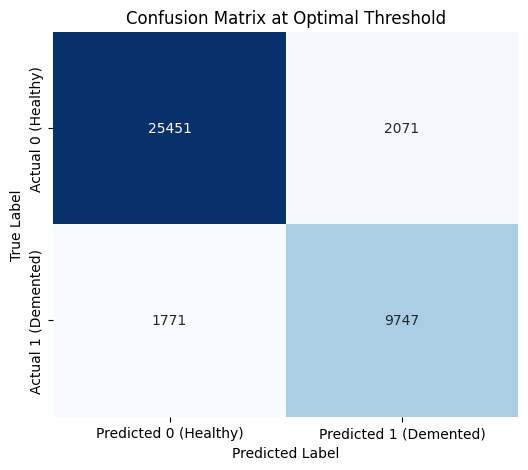

In [106]:
# Confusion matrix at optimal threshold
cm_opt = np.array([[25451, 2071],
                   [1771, 9747]])

plt.figure(figsize=(6,5))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0 (Healthy)','Predicted 1 (Demented)'],
            yticklabels=['Actual 0 (Healthy)','Actual 1 (Demented)'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix at Optimal Threshold")
plt.show()

In [107]:
best_threshold = 0.4
final_model_package = {
    "model": voting_clf_best,
    "threshold": best_threshold
}


In [108]:
joblib.dump(final_model_package,
            "D:\Study\Model X\Dementia Prediction\Models/final_model_with_threshold.pkl")

['D:\\Study\\Model X\\Dementia Prediction\\Models/final_model_with_threshold.pkl']